In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
pa=pd.read_csv("output/machinepatents.csv",index_col=0)
pa.head(5)
paIPC=pd.read_csv("output/machinepatIPCs.csv",index_col=0)
pa.head(5)
table=pd.merge(paIPC,pa,on="PatentNumber")

In [24]:
table["main"]=list(map(lambda x: re.match("\w\d\d\w-\d\d\d",x).group(0),table["IPC"]))
region="World"
table=table
# [table.region!="World"]

In [25]:
table.head(10)

,PatentNumber,IPC,Title,publishDate,language,pages,region,na,main
0,KR2011074434-A,B66C-013/28,Hybrid winch drive system has power generatin...,2011.0,NaN,4.0,World,KR,B66C-013
1,KR2011074434-A,B66C-013/42,Hybrid winch drive system has power generatin...,2011.0,NaN,4.0,World,KR,B66C-013
2,JP2011162655-A,C10M-105/32,"Apparatus for regenerating hydraulic oil, has...",2011.0,Japanese,2.0,World,JP,C10M-105
3,JP2011162655-A,C10M-105/74,"Apparatus for regenerating hydraulic oil, has...",2011.0,Japanese,2.0,World,JP,C10M-105
4,CN201924308-U,E01H-005/04,"Snow sweeping vehicle for use in e.g. road, h...",2011.0,Chinese,0.0,China,CN,E01H-005
5,CN201963644-U,F16B-001/02,"Universal oil opening connecting flange set, ...",2011.0,Chinese,7.0,China,CN,F16B-001
6,BY15691-C1,E02F-009/22,Hydraulic system for one-bucket frontal loader.,2012.0,Russian,1.0,World,BY,E02F-009
7,BY14471-C1,E02F-009/22,Earthmoving scraper hydraulic system.,2011.0,Russian,1.0,World,BY,E02F-009
8,BY14114-C1,E02F-009/22,Loader hydraulic system used in designs of on...,2011.0,Russian,1.0,World,BY,E02F-009
9,BY15428-C1,B60T-011/10,Check valve for controlling foot brake of hyd...,2012.0,Russian,1.0,World,BY,B60T-011


In [26]:
IPC_top10_index=table.groupby("main").count().sort_values(by="PatentNumber",ascending=False)[0:9].index
IPC_top10_index

Index(['F15B-011', 'F15B-013', 'E02F-009', 'F15B-021', 'B60T-013', 'F15B-001',
       'E02F-003', 'F16H-061', 'G01N-003'],
      dtype='object', name='main')

In [27]:
data=table[table["main"].isin(IPC_top10_index)].groupby(["main","publishDate"]).count()["IPC"]
data[IPC_top10_index[0]]

publishDate
2011.0    260
2012.0    351
2013.0    580
2014.0    785
2015.0    940
2016.0    819
2017.0    882
2018.0    941
2019.0    854
2020.0    247
Name: IPC, dtype: int64

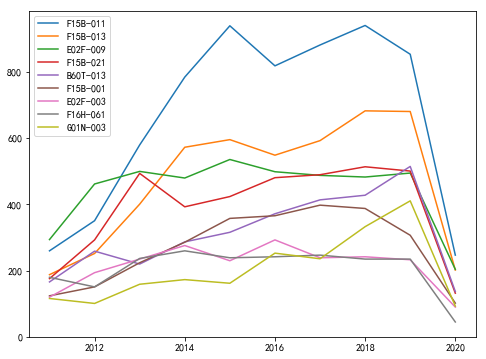

In [28]:
plt.figure(figsize=(8, 6))

for ipc in IPC_top10_index:

    plt.plot(data[ipc].index,data[ipc].values)
plt.legend(IPC_top10_index)
plt.savefig("IPC分类统计表"+region+".png")

